In [73]:
import pandas as pd
import numpy as np
import pyreadstat

In [74]:
sample = pd.read_csv('sample.csv')

In [75]:
demographics = pd.read_spss('demographics.sav')

In [76]:
sample

,respondent number;Contact with advertisment
0,8056;0
1,5101;0
2,3293;6
3,1175;7
4,5284;0
...,...
624,6873;
625,2664;7
626,5199;3
627,5614;0


In [77]:
sample.columns

Index(['respondent number;Contact with advertisment'], dtype='object')

In [78]:
sample[['respondent number', 'Contact with advertisment']] = sample['respondent number;Contact with advertisment'].str.split(';', expand = True)

In [79]:
sample['respondent number'] = sample['respondent number'].astype(int)

In [80]:
sample.drop('respondent number;Contact with advertisment', axis = 1, inplace = True)

In [81]:
sample.head()

,respondent number,Contact with advertisment
0,8056,0
1,5101,0
2,3293,6
3,1175,7
4,5284,0


In [82]:
demographics

,id,gender,age,region,education
0,8056.0,female,40_44_years_old,middle_west,secondary_school_finished
1,5101.0,female,50_54_years_old,north_east,university
2,3293.0,female,65_69_years_old,south_west,secondary_school_finished
3,1175.0,male,60_64_years_old,south_west,secondary_school_finished
4,5284.0,male,65_69_years_old,middle_west,university
...,...,...,...,...,...
1019,4057.0,female,20_24_years_old,central,secondary_school_finished
1020,3215.0,female,40_44_years_old,central,university
1021,6676.0,male,40_44_years_old,central,secondary_school_finished
1022,6724.0,female,45_49_years_old,south_east,secondary_school_finished


In [83]:
demographics.columns

Index(['id', 'gender', 'age', 'region', 'education'], dtype='object')

In [84]:
df = pd.merge(sample, demographics, left_on = 'respondent number', right_on = 'id')

In [85]:
df

,respondent number,Contact with advertisment,id,gender,age,region,education
0,8056,0,8056.0,female,40_44_years_old,middle_west,secondary_school_finished
1,5101,0,5101.0,female,50_54_years_old,north_east,university
2,3293,6,3293.0,female,65_69_years_old,south_west,secondary_school_finished
3,1175,7,1175.0,male,60_64_years_old,south_west,secondary_school_finished
4,5284,0,5284.0,male,65_69_years_old,middle_west,university
...,...,...,...,...,...,...,...
624,6873,,6873.0,female,60_64_years_old,south_east,university
625,2664,7,2664.0,female,20_24_years_old,middle_south,secondary_school_finished
626,5199,3,5199.0,female,60_64_years_old,middle_south,secondary_school_finished
627,5614,0,5614.0,female,30_34_years_old,middle_south,university


In [86]:
df.drop(['id'], axis = 1, inplace = True)

In [87]:
df.head()

,respondent number,Contact with advertisment,gender,age,region,education
0,8056,0,female,40_44_years_old,middle_west,secondary_school_finished
1,5101,0,female,50_54_years_old,north_east,university
2,3293,6,female,65_69_years_old,south_west,secondary_school_finished
3,1175,7,male,60_64_years_old,south_west,secondary_school_finished
4,5284,0,male,65_69_years_old,middle_west,university


In [88]:
df.drop_duplicates(inplace = True)

In [89]:
import missingno
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: >

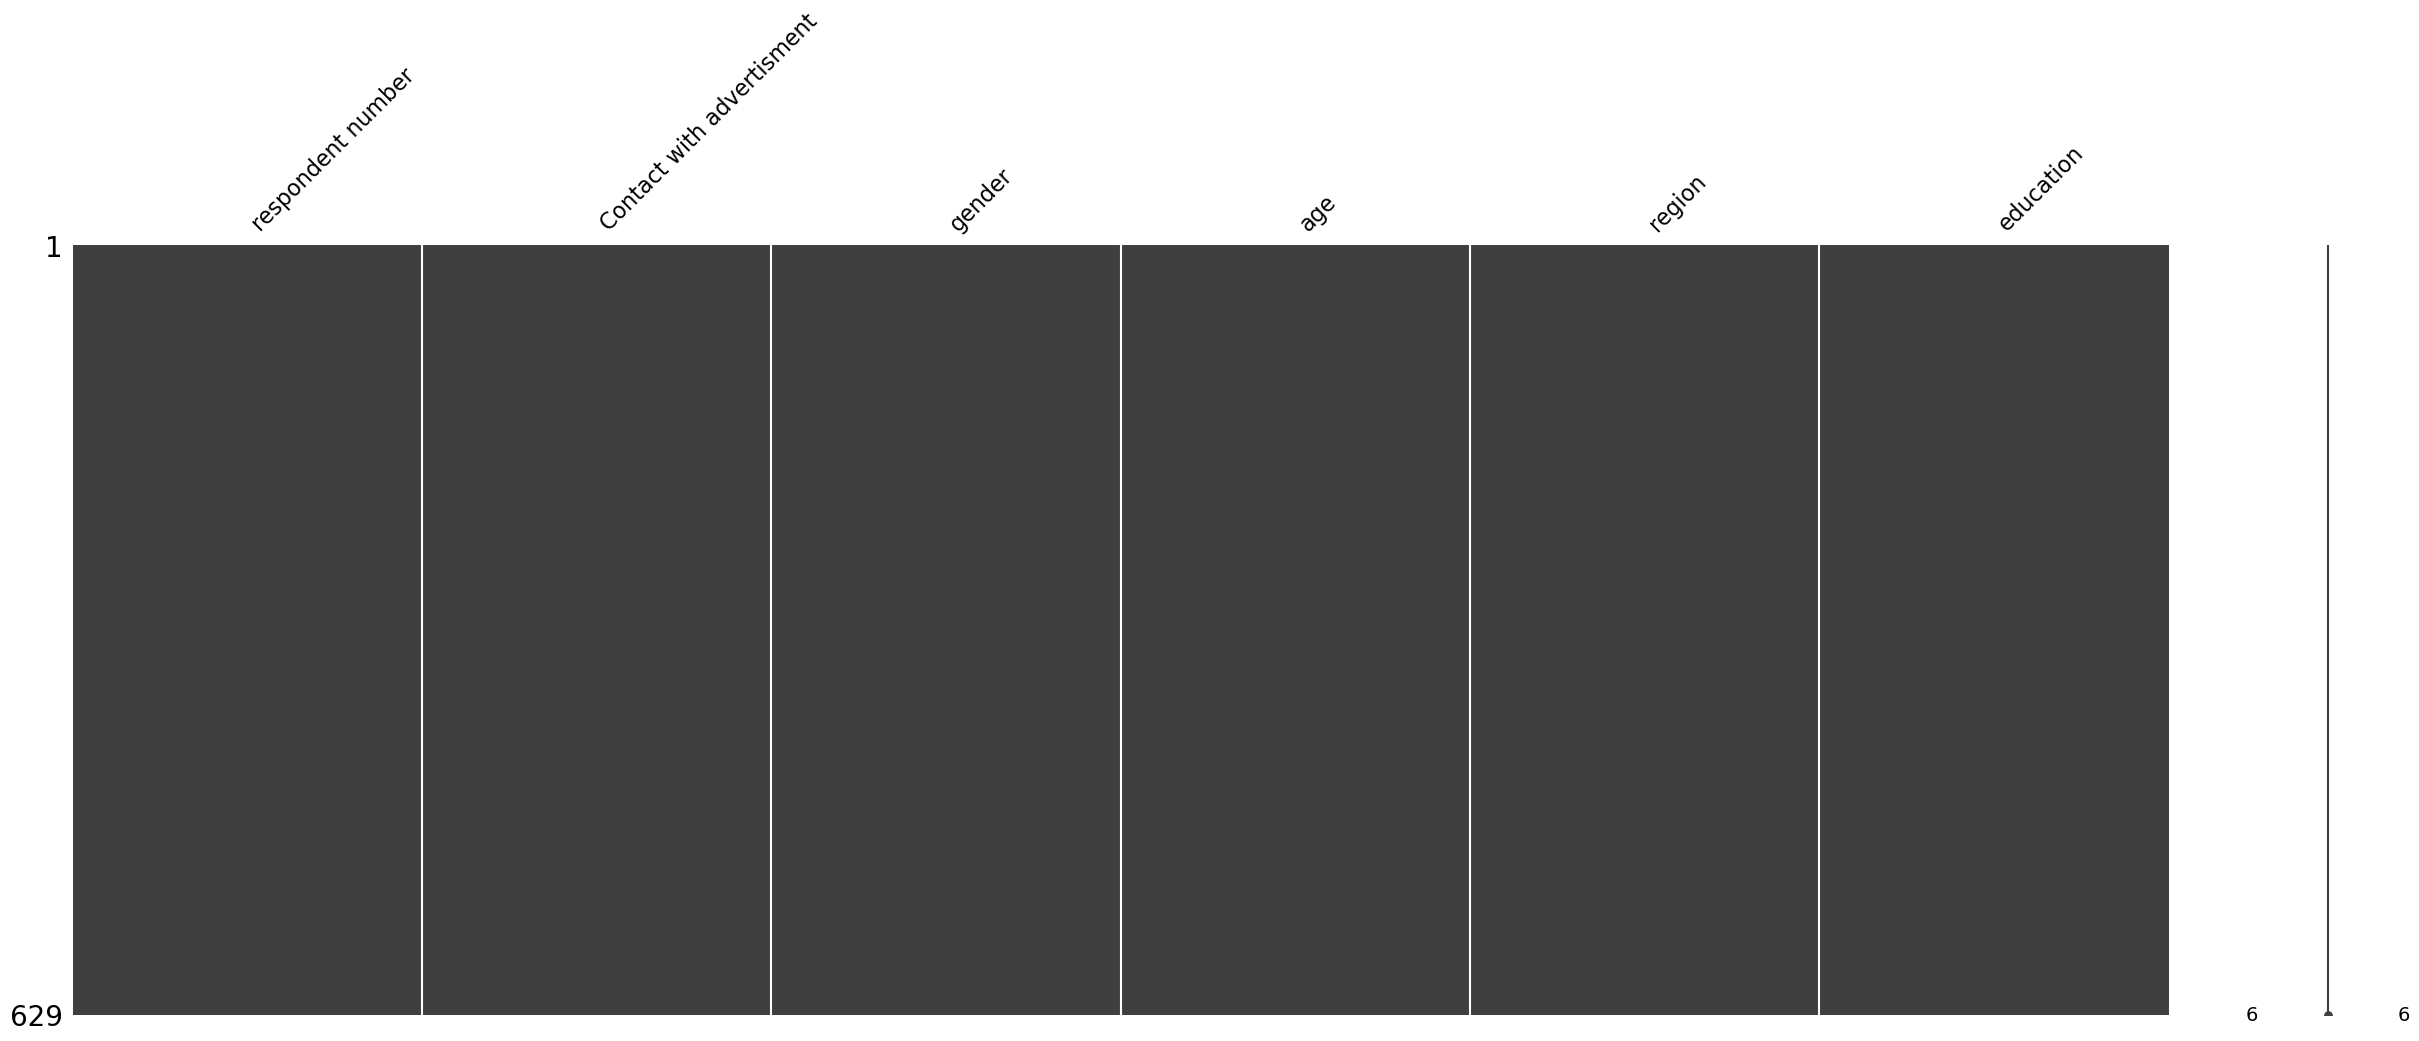

In [90]:
missingno.matrix(df, figsize = (30,10))

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   respondent number          629 non-null    int32 
 1   Contact with advertisment  629 non-null    object
 2   gender                     629 non-null    object
 3   age                        629 non-null    object
 4   region                     629 non-null    object
 5   education                  629 non-null    object
dtypes: int32(1), object(5)
memory usage: 31.9+ KB


In [92]:
from pandas_profiling import ProfileReport

In [93]:
# report = ProfileReport(df)
# report.to_file('report.thml')

In [94]:
df['Contact with advertisment'].unique()

array(['0', '6', '7', '1', '3', '2', '4', '5', '9', '8', ''], dtype=object)

In [95]:
df['Contact with advertisment'].replace('', np.nan, inplace = True)

In [96]:
df['Contact with advertisment'].unique()

array(['0', '6', '7', '1', '3', '2', '4', '5', '9', '8', nan],
      dtype=object)

In [97]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [98]:
df['age'].unique()

array(['40_44_years_old', '50_54_years_old', '65_69_years_old',
       '60_64_years_old', '35_39_years_old', '45_49_years_old',
       '75_years_old', '20_24_years_old', '55_59_years_old',
       '30_34_years_old', '25_29_years_old', '18_19_years_old',
       '70_74_years_old', '15_17_years_old'], dtype=object)

In [99]:
df['region'].unique()

array(['middle_west', 'north_east', 'south_west', 'north', 'south',
       'central', 'middle_south', 'south_east'], dtype=object)

In [100]:
df['education'].unique()

array(['secondary_school_finished', 'university',
       'profession_or_secondary', 'primary'], dtype=object)

In [101]:
df.columns

Index(['respondent number', 'Contact with advertisment', 'gender', 'age',
       'region', 'education'],
      dtype='object')

In [102]:
df = df[['respondent number', 'gender', 'age', 'region', 'education',  'Contact with advertisment']]

<AxesSubplot: >

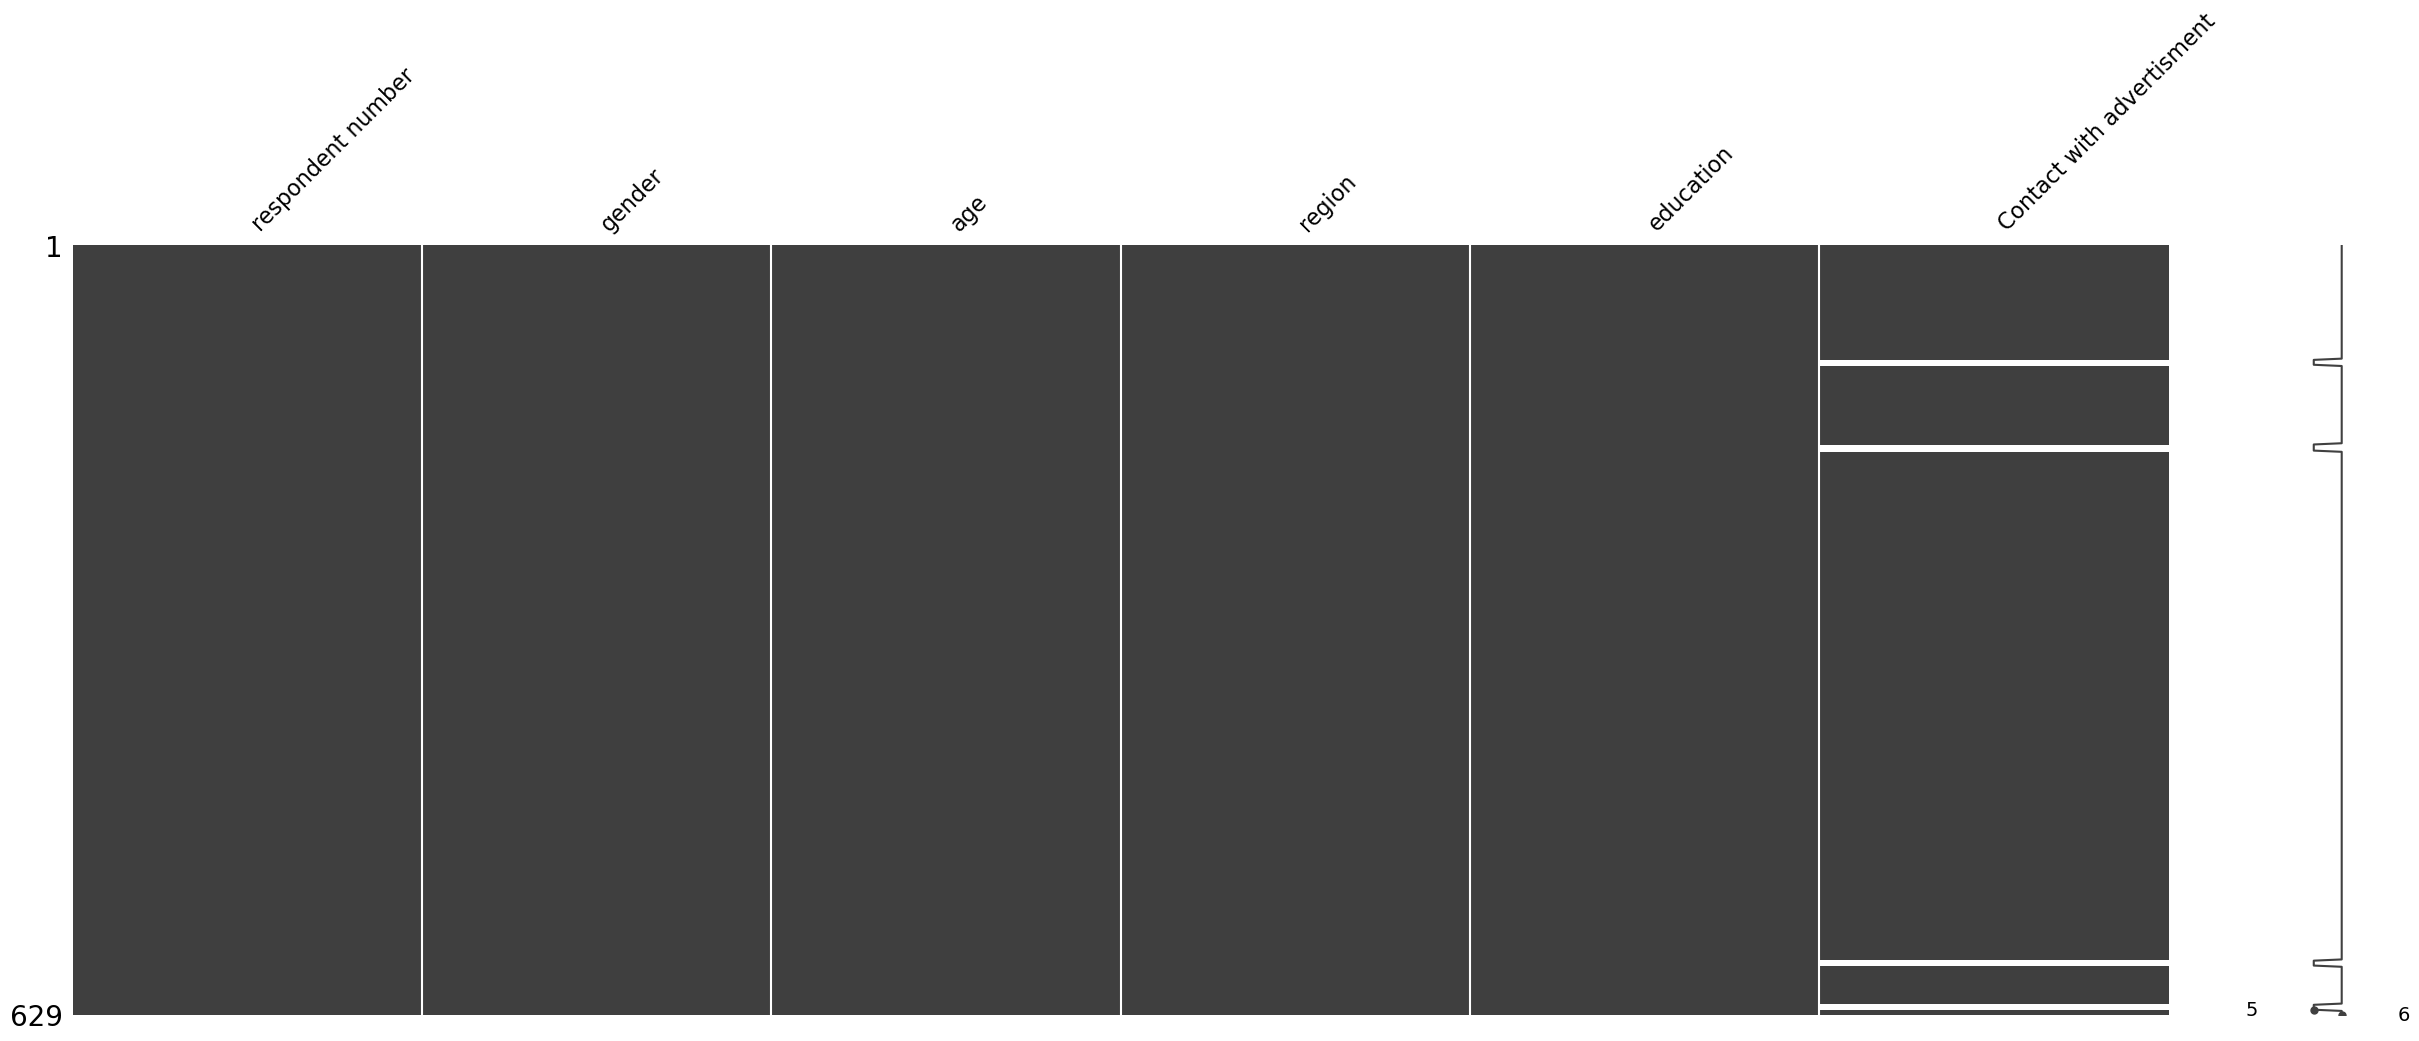

In [103]:
missingno.matrix(df, figsize = (30,10))

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   respondent number          629 non-null    int32 
 1   gender                     629 non-null    object
 2   age                        629 non-null    object
 3   region                     629 non-null    object
 4   education                  629 non-null    object
 5   Contact with advertisment  608 non-null    object
dtypes: int32(1), object(5)
memory usage: 31.9+ KB


In [105]:
df['Contact with advertisment'].isnull().sum()

21

In [106]:
df['Contact with advertisment'].isnull().sum()/len(df)

0.033386327503974564

In [107]:
df[df['Contact with advertisment'].isnull() == True]

,respondent number,gender,age,region,education,Contact with advertisment
94,3587,male,55_59_years_old,north_east,secondary_school_finished,NaN
95,1397,female,40_44_years_old,middle_south,secondary_school_finished,NaN
96,3124,female,40_44_years_old,south,university,NaN
97,4406,female,50_54_years_old,north_east,secondary_school_finished,NaN
98,4008,male,18_19_years_old,middle_west,primary,NaN
163,7286,female,20_24_years_old,middle_west,secondary_school_finished,NaN
164,1341,female,35_39_years_old,central,university,NaN
165,8381,male,40_44_years_old,central,profession_or_secondary,NaN
166,3073,male,45_49_years_old,south_east,secondary_school_finished,NaN
167,3379,female,50_54_years_old,south_east,university,NaN


In [108]:
df['age'].unique()

array(['40_44_years_old', '50_54_years_old', '65_69_years_old',
       '60_64_years_old', '35_39_years_old', '45_49_years_old',
       '75_years_old', '20_24_years_old', '55_59_years_old',
       '30_34_years_old', '25_29_years_old', '18_19_years_old',
       '70_74_years_old', '15_17_years_old'], dtype=object)

In [109]:
df['age'] = df['age'].replace(['15_17_years_old', '18_19_years_old', '20_24_years_old', '25_29_years_old',
                               '30_34_years_old', '35_39_years_old', '40_44_years_old', '45_49_years_old',
                               '50_54_years_old', '55_59_years_old', '60_64_years_old', '65_69_years_old',
                               '70_74_years_old', '75_years_old'], 
                                ['15-17', '18-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', 
                                 '50-54','55-59', '60-64', '65-69', '70-74', '75'])

In [110]:
df['education'].unique()

array(['secondary_school_finished', 'university',
       'profession_or_secondary', 'primary'], dtype=object)

In [111]:
contacts_order = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
age_order = ['15-17', '18-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', 
                                 '50-54','55-59', '60-64', '65-69', '70-74', '75']
education_order = ['primary', 'profession_or_secondary', 'secondary_school_finished', 'university']

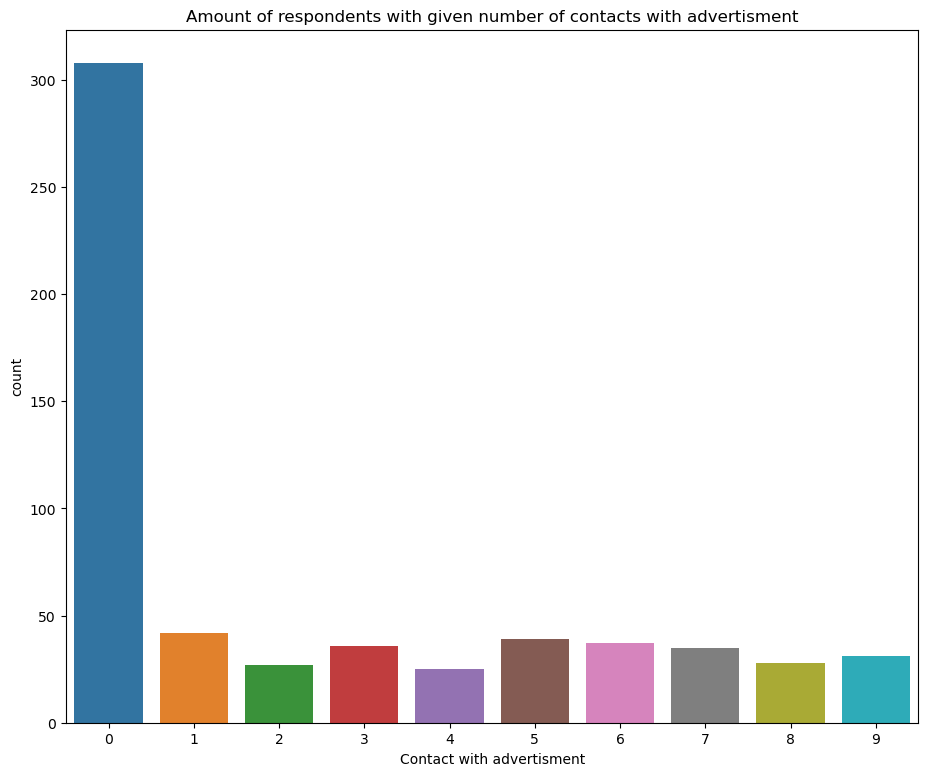

In [112]:
f, ax = plt.subplots(figsize=(11, 9))
sns.countplot(x = 'Contact with advertisment', data = df, order = contacts_order)
plt.title('Amount of respondents with given number of contacts with advertisment')
plt.show()

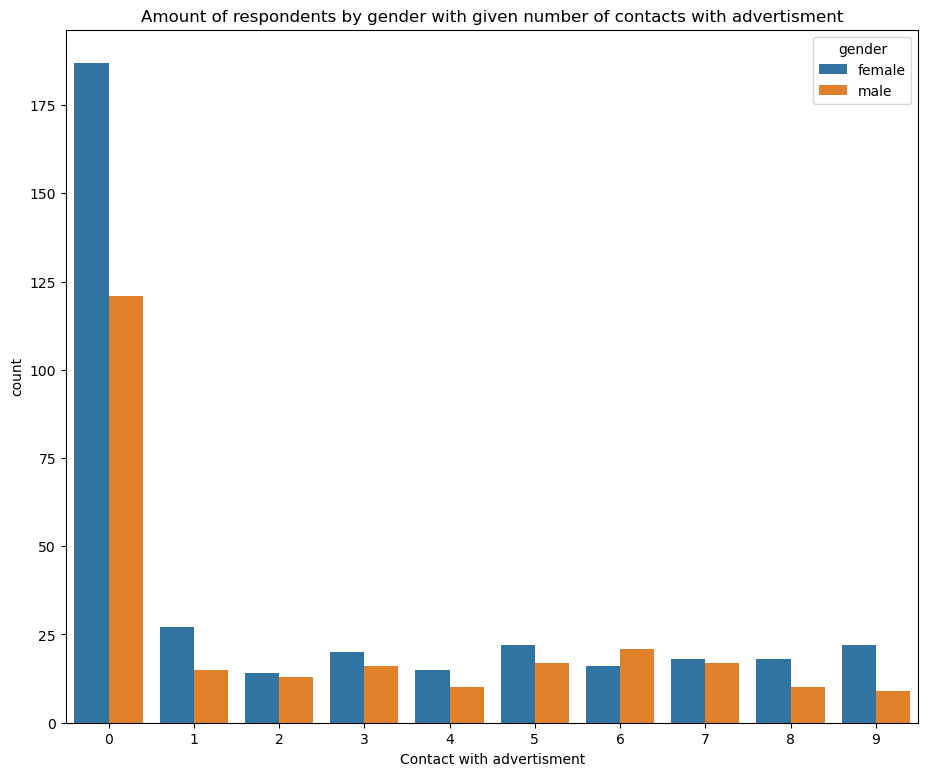

In [113]:
f, ax = plt.subplots(figsize=(11, 9))
sns.countplot(x = 'Contact with advertisment', hue = 'gender', data = df, order = contacts_order)
plt.title('Amount of respondents by gender with given number of contacts with advertisment')
plt.show()

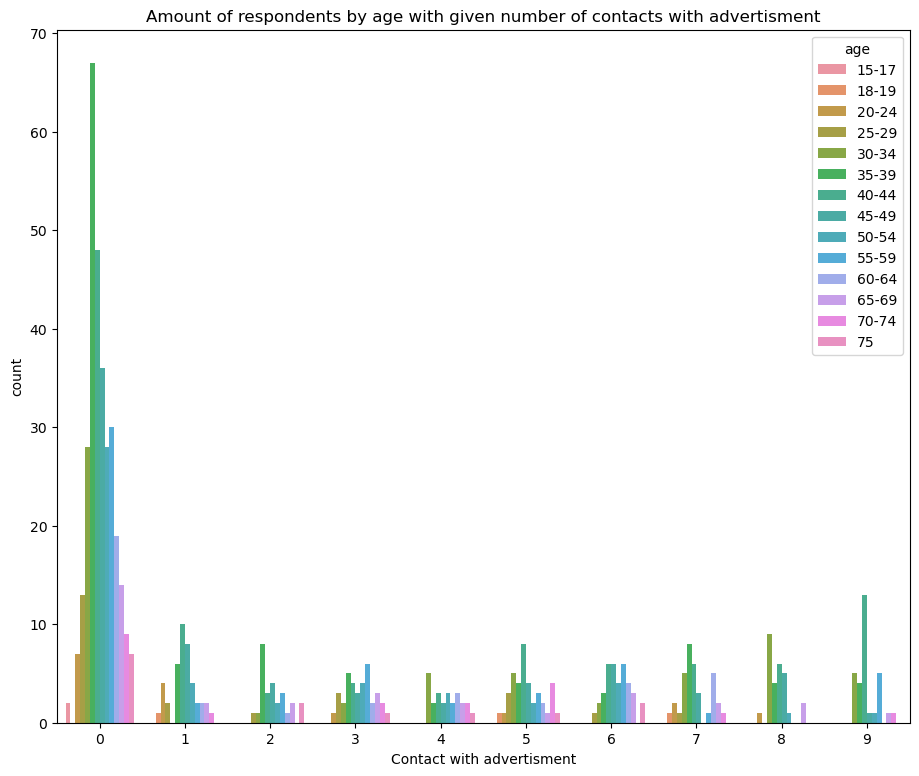

In [114]:
f, ax = plt.subplots(figsize=(11, 9))
sns.countplot(x = 'Contact with advertisment', hue = 'age', data = df, order = contacts_order, 
              hue_order = age_order)
plt.title('Amount of respondents by age with given number of contacts with advertisment')
plt.show()

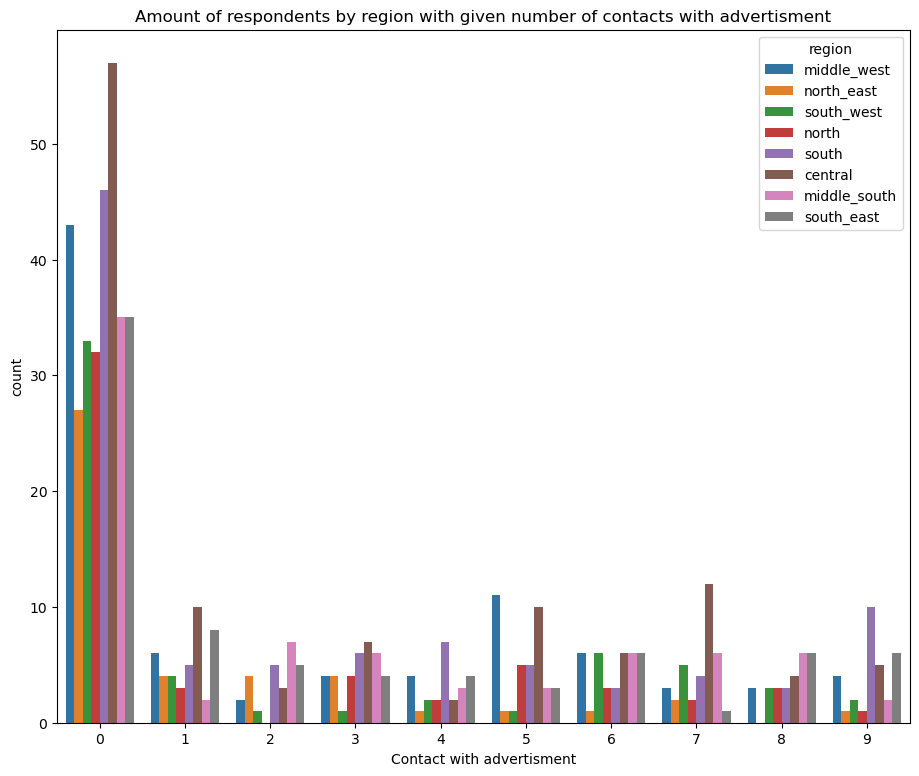

In [115]:
f, ax = plt.subplots(figsize=(11, 9))
sns.countplot(x = 'Contact with advertisment', hue = 'region', data = df, order = contacts_order)
plt.title('Amount of respondents by region with given number of contacts with advertisment')
plt.show()

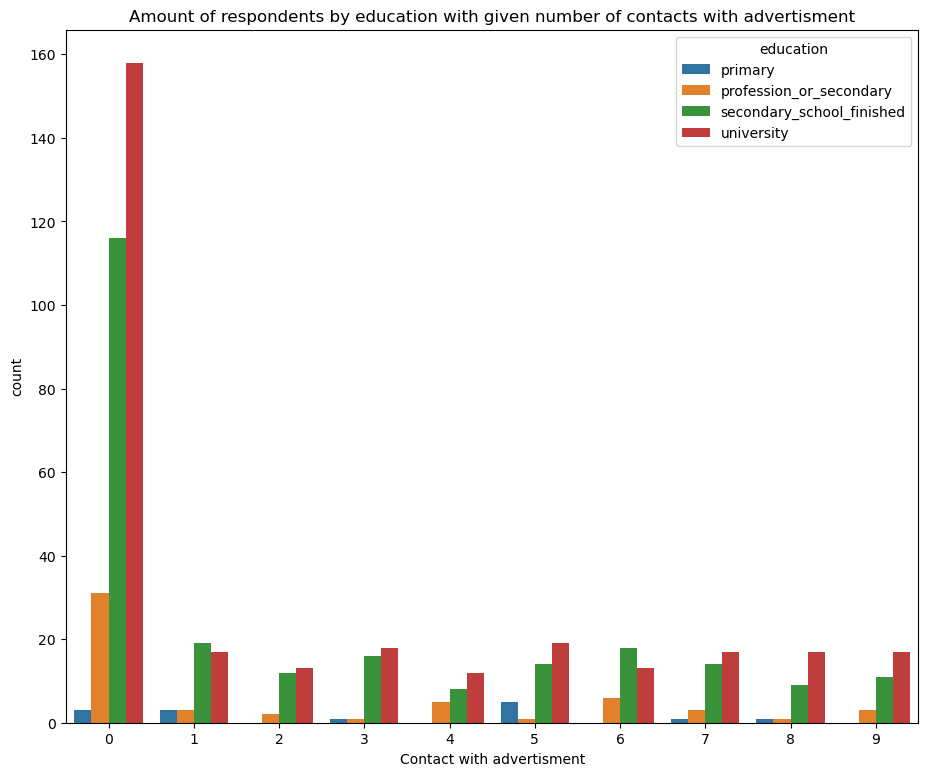

In [116]:
f, ax = plt.subplots(figsize=(11, 9))
sns.countplot(x = 'Contact with advertisment', hue = 'education', data = df, order = contacts_order, 
              hue_order = education_order)
plt.title('Amount of respondents by education with given number of contacts with advertisment')
plt.show()

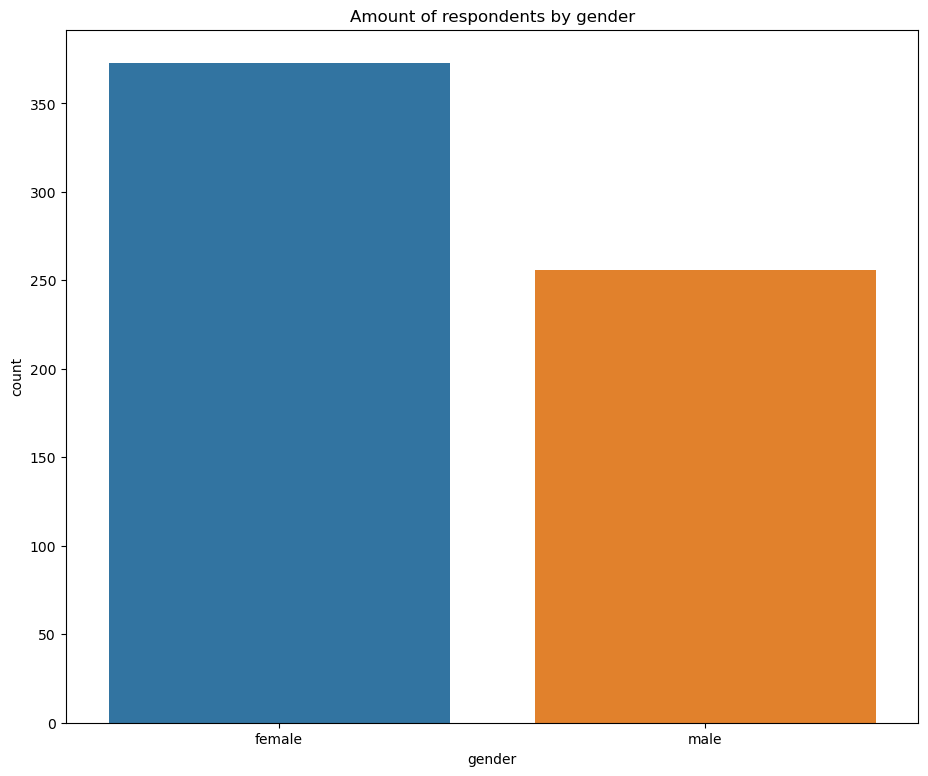

In [117]:
f, ax = plt.subplots(figsize=(11, 9))
sns.countplot(x = 'gender', data = df)
plt.title('Amount of respondents by gender')
plt.show()

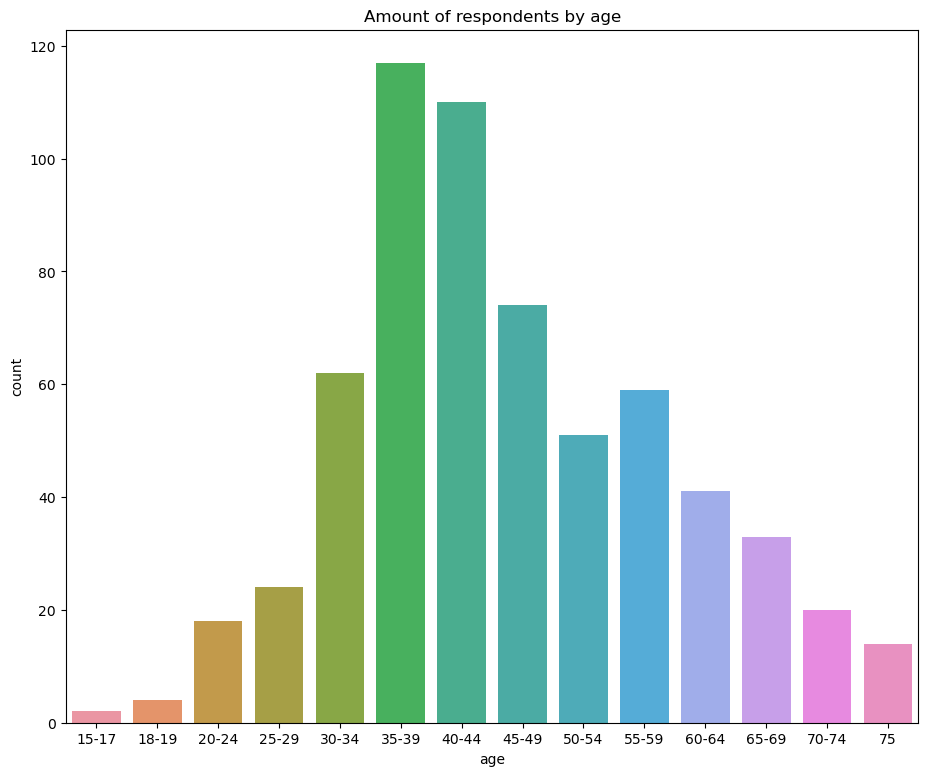

In [118]:
f, ax = plt.subplots(figsize=(11, 9))
sns.countplot(x = 'age', data = df, order = age_order)
plt.title('Amount of respondents by age')
plt.show()

<AxesSubplot: xlabel='region', ylabel='count'>

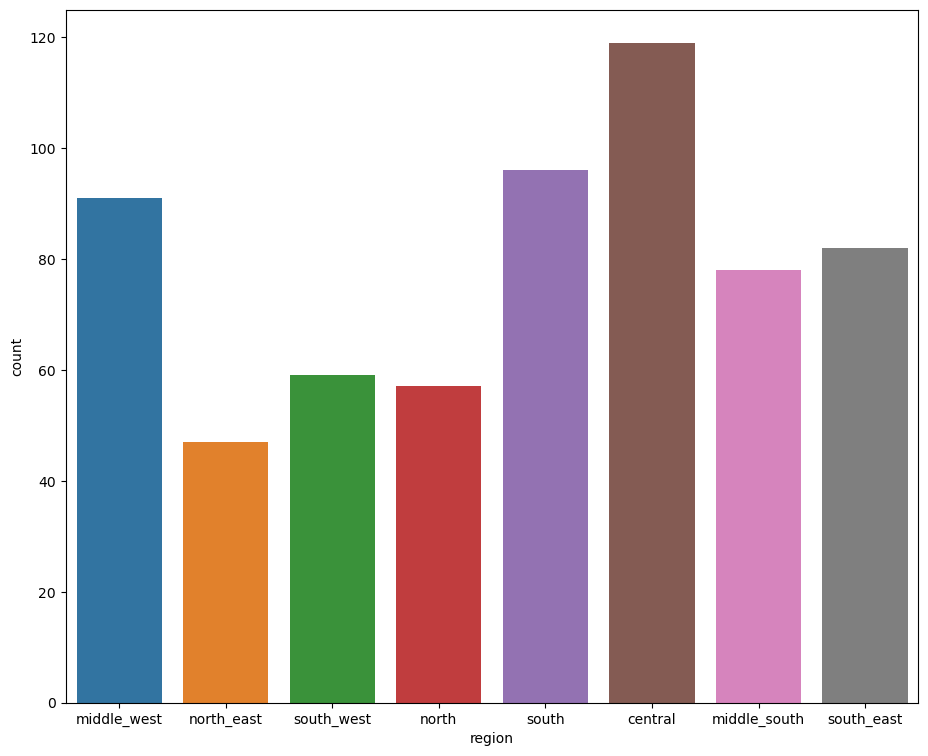

In [119]:
f, ax = plt.subplots(figsize=(11, 9))
sns.countplot(x = 'region', data = df)

<AxesSubplot: xlabel='education', ylabel='count'>

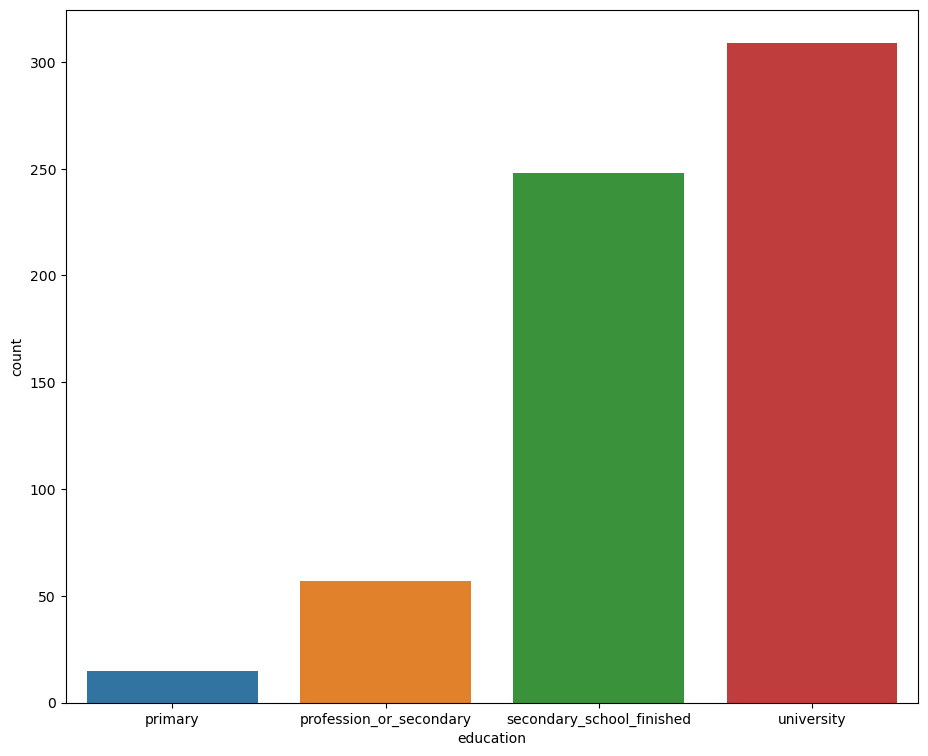

In [120]:
f, ax = plt.subplots(figsize=(11, 9))
sns.countplot(x = 'education', data = df, order = education_order)

In [121]:
df.drop_duplicates()

,respondent number,gender,age,region,education,Contact with advertisment
0,8056,female,40-44,middle_west,secondary_school_finished,0
1,5101,female,50-54,north_east,university,0
2,3293,female,65-69,south_west,secondary_school_finished,6
3,1175,male,60-64,south_west,secondary_school_finished,7
4,5284,male,65-69,middle_west,university,0
...,...,...,...,...,...,...
624,6873,female,60-64,south_east,university,NaN
625,2664,female,20-24,middle_south,secondary_school_finished,7
626,5199,female,60-64,middle_south,secondary_school_finished,3
627,5614,female,30-34,middle_south,university,0


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   respondent number          629 non-null    int32 
 1   gender                     629 non-null    object
 2   age                        629 non-null    object
 3   region                     629 non-null    object
 4   education                  629 non-null    object
 5   Contact with advertisment  608 non-null    object
dtypes: int32(1), object(5)
memory usage: 31.9+ KB


In [123]:
df['Contact with advertisment'] = pd.to_numeric(df['Contact with advertisment']).convert_dtypes() 

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   respondent number          629 non-null    int32 
 1   gender                     629 non-null    object
 2   age                        629 non-null    object
 3   region                     629 non-null    object
 4   education                  629 non-null    object
 5   Contact with advertisment  608 non-null    Int64 
dtypes: Int64(1), int32(1), object(4)
memory usage: 32.6+ KB


In [125]:
df['education'].unique()

array(['secondary_school_finished', 'university',
       'profession_or_secondary', 'primary'], dtype=object)

In [126]:
gender = {
    'male': 5000000,
    'female': 6000000
}

age = {
    '15-17': 600000,
    '18-19': 700000,
    '20-24': 900000,
    '25-29': 1000000,
    '30-34': 1300000,
    '35-39': 1500000,
    '40-44': 1000000,
    '45-49': 900000,
    '50-54': 700000,
    '55-59': 600000,
    '60-64': 500000,
    '65-69': 400000,
    '70-74': 500000,
    '75': 400000
}

region = {
    'middle_west': 2000000,
    'north_east': 1500000,
    'south_west': 2000000,
    'north': 1000000,
    'south': 1500000,
    'central': 500000,
    'middle_south': 1500000,
    'south_east': 1000000
}

education = {
    'secondary_school_finished': 1500000,
    'university': 4000000,
    'profession_or_secondary': 4000000,
    'primary': 1500000,

}

In [129]:
def calculate_weights(data, gender, age, region, education):
    for g in gender.keys():
        for a in age.keys():
            for r in region.keys():
                for e in education.keys():
                    weight = (gender[g] / sum(gender.values())) * (age[a] / sum(age.values())) * \
                             (region[r] / sum(region.values())) * (education[e] / sum(education.values()))

                    mask = (data['gender'] == g) & (data['age'] == a) & \
                           (data['region'] == r) & (data['education'] == e)

                    data.loc[mask, 'weight'] = weight
        print(type(mask))
    return data

In [130]:
df = calculate_weights(df, gender, age, region, education)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [57]:
df.head()

,respondent number,gender,age,region,education,Contact with advertisment,weight
0,8056,female,40-44,middle_west,secondary_school_finished,0,0.001229
1,5101,female,50-54,north_east,university,0,0.001721
2,3293,female,65-69,south_west,secondary_school_finished,6,0.000492
3,1175,male,60-64,south_west,secondary_school_finished,7,0.000512
4,5284,male,65-69,middle_west,university,0,0.001093


In [58]:
df = df[['respondent number', 'gender', 'age', 'region','education', 'weight', 'Contact with advertisment']]

In [59]:
df.describe()

,respondent number,weight,Contact with advertisment
count,629.000000,629.000000,608.000000
mean,4926.394277,0.001389,2.416118
std,2322.582199,0.001023,3.050838
min,1008.000000,0.000102,0.000000
25%,2952.000000,0.000656,0.000000
50%,4876.000000,0.001066,0.000000
75%,6961.000000,0.001844,5.000000
max,8993.000000,0.004918,9.000000


In [60]:
df[df['Contact with advertisment'].isnull() == True]

,respondent number,gender,age,region,education,weight,Contact with advertisment
94,3587,male,55-59,north_east,secondary_school_finished,0.000461,<NA>
95,1397,female,40-44,middle_south,secondary_school_finished,0.000922,<NA>
96,3124,female,40-44,south,university,0.002459,<NA>
97,4406,female,50-54,north_east,secondary_school_finished,0.000645,<NA>
98,4008,male,18-19,middle_west,primary,0.000717,<NA>
163,7286,female,20-24,middle_west,secondary_school_finished,0.001106,<NA>
164,1341,female,35-39,central,university,0.001229,<NA>
165,8381,male,40-44,central,profession_or_secondary,0.000683,<NA>
166,3073,male,45-49,south_east,secondary_school_finished,0.000461,<NA>
167,3379,female,50-54,south_east,university,0.001147,<NA>


I have used SimpleImupter(strategy = 'median') because I have to small dataframe to do machine learning model which can predict and impute value instead of NaNs value with good accuracy, and other imputers like KNNImputer and  IterativeImputer don't work for discrate values. I have used strategy = 'median' because median is less sensitive for outliers than mean.

In [61]:
from sklearn.impute import SimpleImputer

In [62]:
imputer = SimpleImputer(strategy = 'median')

In [63]:
df['Contact with advertisment'] = imputer.fit_transform(df[['Contact with advertisment']])

In [64]:
df

,respondent number,gender,age,region,education,weight,Contact with advertisment
0,8056,female,40-44,middle_west,secondary_school_finished,0.001229,0.0
1,5101,female,50-54,north_east,university,0.001721,0.0
2,3293,female,65-69,south_west,secondary_school_finished,0.000492,6.0
3,1175,male,60-64,south_west,secondary_school_finished,0.000512,7.0
4,5284,male,65-69,middle_west,university,0.001093,0.0
...,...,...,...,...,...,...,...
624,6873,female,60-64,south_east,university,0.000820,0.0
625,2664,female,20-24,middle_south,secondary_school_finished,0.000830,7.0
626,5199,female,60-64,middle_south,secondary_school_finished,0.000461,3.0
627,5614,female,30-34,middle_south,university,0.003197,0.0


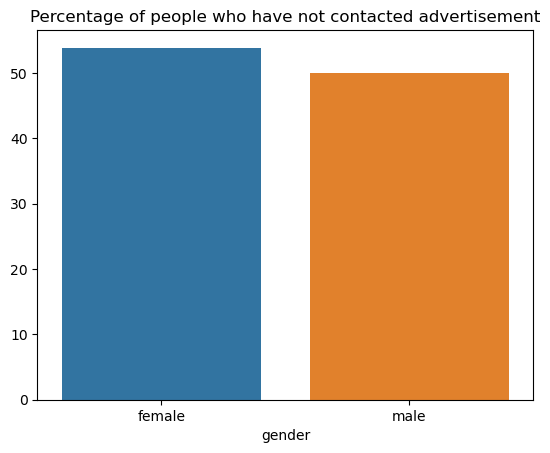

In [65]:
df_filtered = df.groupby('gender')['Contact with advertisment'].apply(lambda x: (x == 0).mean() * 100)
sns.barplot(x = df_filtered.index, y = df_filtered.values)    
plt.title('Percentage of people who have not contacted advertisement')
plt.show()

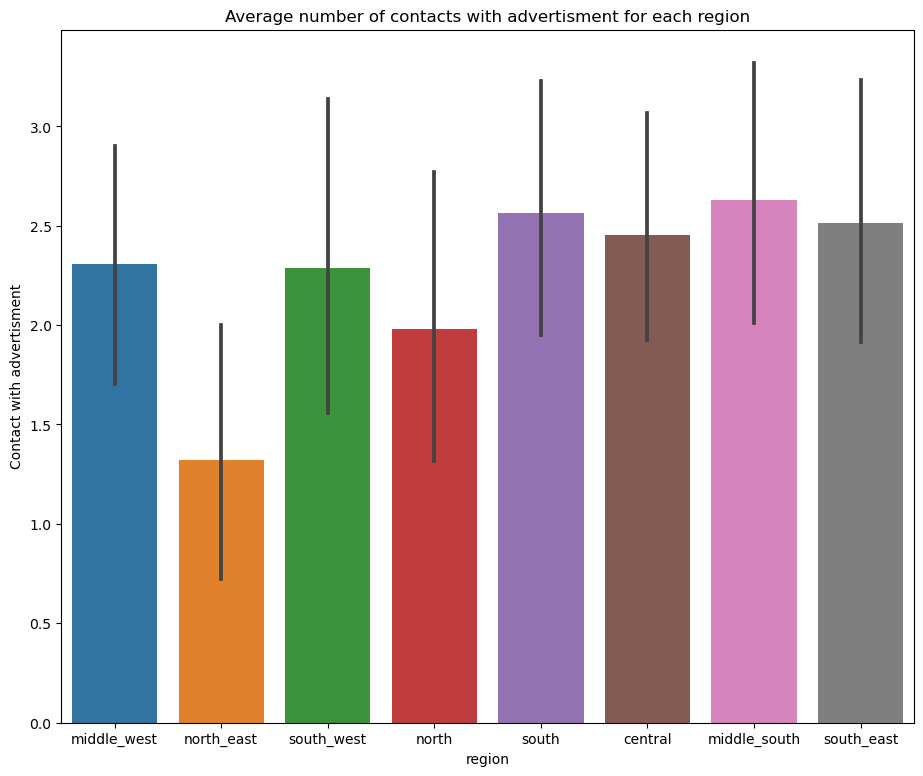

In [66]:
f, ax = plt.subplots(figsize=(11, 9))
sns.barplot(x = 'region', y = 'Contact with advertisment', data = df, estimator = np.mean)
plt.title('Average number of contacts with advertisment for each region')
plt.show()

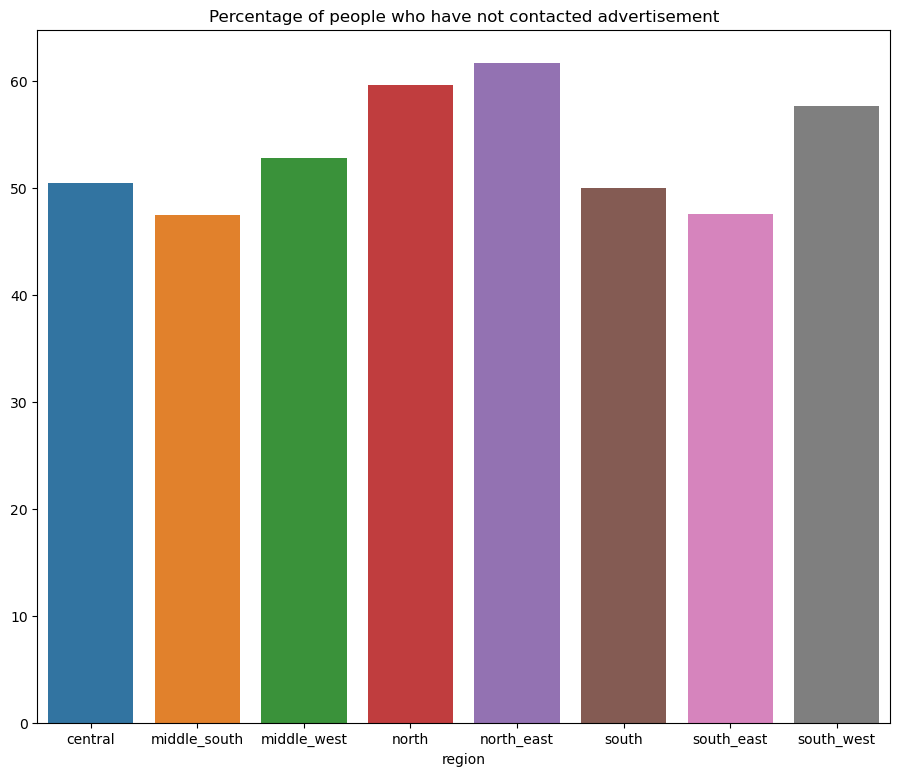

In [67]:
f, ax = plt.subplots(figsize=(11, 9))
df_filtered = df.groupby('region')['Contact with advertisment'].apply(lambda x: (x == 0).mean() * 100)
sns.barplot(x = df_filtered.index, y = df_filtered.values)
plt.title('Percentage of people who have not contacted advertisement')
plt.show()

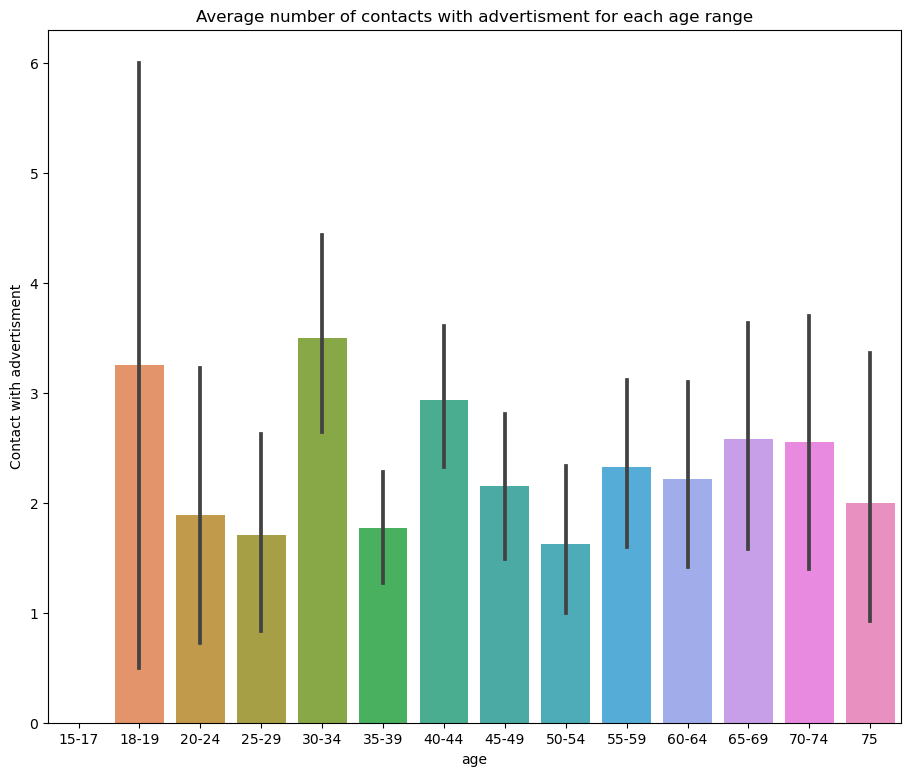

In [68]:
f, ax = plt.subplots(figsize=(11, 9))
sns.barplot(x = 'age', y = 'Contact with advertisment', data = df, estimator = np.mean, order = age_order)
plt.title('Average number of contacts with advertisment for each age range')
plt.show()

In [69]:
df_filtered = df.query("age in ['20-24', '25-29', '30-34', '35-39']")
male_avg_20_to_40 = df_filtered.query("gender == 'male'")['Contact with advertisment'].sum() / \
                    df_filtered.query("gender == 'male'")['Contact with advertisment'].count()
female_avg_20_to_40 = df_filtered.query("gender == 'female'")['Contact with advertisment'].sum() / \
                    df_filtered.query("gender == 'female'")['Contact with advertisment'].count()

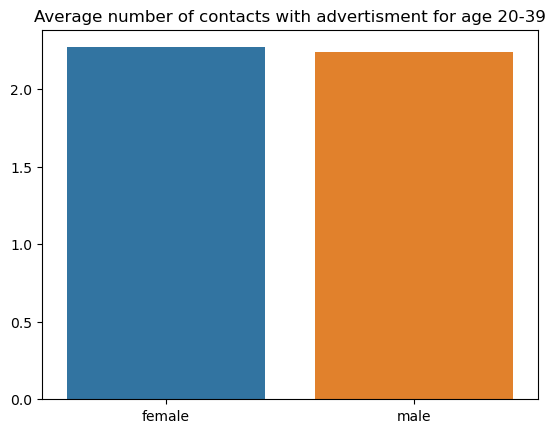

In [70]:
sns.barplot(x = ['female', 'male'], y = [female_avg_20_to_40, male_avg_20_to_40], order=['female', 'male'])
plt.title('Average number of contacts with advertisment for age 20-39')
plt.show()

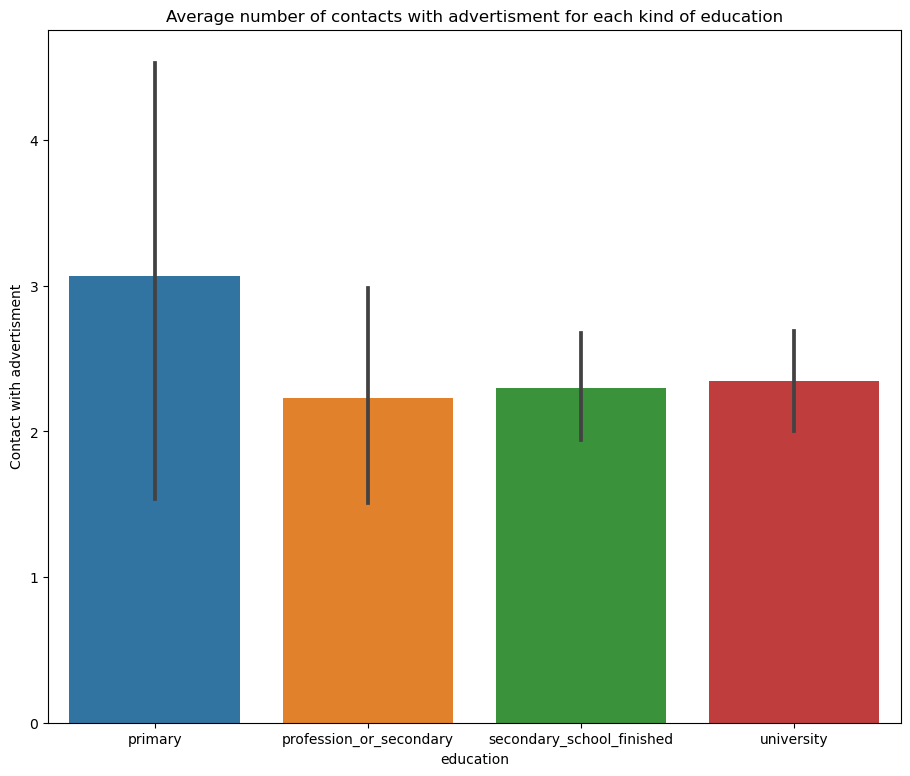

In [71]:
f, ax = plt.subplots(figsize=(11, 9))
sns.barplot(x = 'education', y = 'Contact with advertisment', data = df, estimator = np.mean,
            order = education_order)
plt.title('Average number of contacts with advertisment for each kind of education')
plt.show()

In [72]:
df.to_csv('final_data.csv', index=False)